In [7]:
# !pip install pyzorder
# !which python

In [23]:
from pyzorder import ZOrderIndexer
import numpy as np
import matplotlib.pyplot as plt

In [29]:
from pyzorder import ZOrderIndexer

zi = ZOrderIndexer((0, 60), (0, 60))

z_2_2 = zi.zindex(2, 2)
# z_2_2 = 12

zi.next_zorder_index(z_2_2)
# return 13

zi.next_zorder_index(15)
# return 36

16

In [45]:
order = []
order_2d = []
order_dih = []

for i in range(60):
    for j in range(60):
        print(
            i, j, ":", zi.zindex(i, j)
        )  # , "--" , zi.next_zorder_index(i), zi.next_zorder_index(j))
        order_dih.append([dih1[i], dih2[j]])
        order_2d.append([i, j])
        order.append(zi.zindex(i, j))

0 0 : 0
0 1 : 2
0 2 : 8
0 3 : 10
0 4 : 32
0 5 : 34
0 6 : 40
0 7 : 42
0 8 : 128
0 9 : 130
0 10 : 136
0 11 : 138
0 12 : 160
0 13 : 162
0 14 : 168
0 15 : 170
0 16 : 512
0 17 : 514
0 18 : 520
0 19 : 522
0 20 : 544
0 21 : 546
0 22 : 552
0 23 : 554
0 24 : 640
0 25 : 642
0 26 : 648
0 27 : 650
0 28 : 672
0 29 : 674
0 30 : 680
0 31 : 682
0 32 : 2048
0 33 : 2050
0 34 : 2056
0 35 : 2058
0 36 : 2080
0 37 : 2082
0 38 : 2088
0 39 : 2090
0 40 : 2176
0 41 : 2178
0 42 : 2184
0 43 : 2186
0 44 : 2208
0 45 : 2210
0 46 : 2216
0 47 : 2218
0 48 : 2560
0 49 : 2562
0 50 : 2568
0 51 : 2570
0 52 : 2592
0 53 : 2594
0 54 : 2600
0 55 : 2602
0 56 : 2688
0 57 : 2690
0 58 : 2696
0 59 : 2698
1 0 : 1
1 1 : 3
1 2 : 9
1 3 : 11
1 4 : 33
1 5 : 35
1 6 : 41
1 7 : 43
1 8 : 129
1 9 : 131
1 10 : 137
1 11 : 139
1 12 : 161
1 13 : 163
1 14 : 169
1 15 : 171
1 16 : 513
1 17 : 515
1 18 : 521
1 19 : 523
1 20 : 545
1 21 : 547
1 22 : 553
1 23 : 555
1 24 : 641
1 25 : 643
1 26 : 649
1 27 : 651
1 28 : 673
1 29 : 675
1 30 : 681
1 31 : 683
1 

In [52]:
ordered_order_dih = [_[0] for _ in sorted(zip(order_dih, order), key=lambda x: x[1])]
ordered_order_dih = np.array(ordered_order_dih)

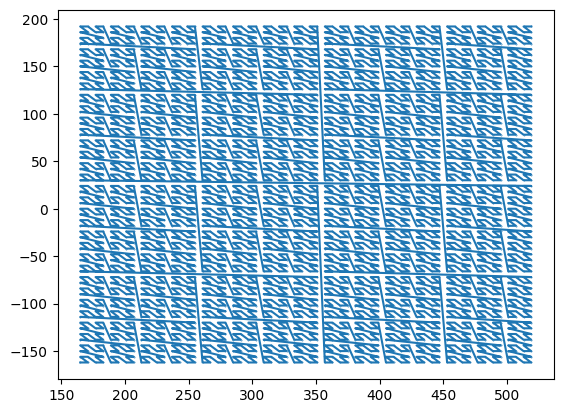

In [53]:
order_dih = np.array(order_dih)

plt.scatter(*order_dih.T, s=0.1)
plt.plot(*ordered_order_dih.T)

In [94]:
ordered_order_dih

array([[ 165., -162.],
       [ 171., -162.],
       [ 165., -156.],
       ...,
       [ 519.,  186.],
       [ 513.,  192.],
       [ 519.,  192.]], shape=(3600, 2))

In [77]:
header = """$constrain
 force constant=0.1
 dihedral: 32,18,15,13, auto
 dihedral: 18,15,13,8, auto
$scan
 mode=sequential
"""
dih1_cmd = " 1:  {start}, {stop}, 2\n"
dih2_cmd = " 2: {start}, {stop}, 2\n"
footer = "$end"

for i, _ in enumerate(ordered_order_dih):
    with open(
        f"/cluster/home/schmidtn/master/wahlprak/xtb-confs/confs/ALA_neutral_singlet.xyz/dih2dscan-{i}.inp",
        "w",
    ) as f:

        f.write(header)

        if i < len(ordered_order_dih) - 1:
            f.write(
                dih1_cmd.format(
                    start=ordered_order_dih[i][0], stop=ordered_order_dih[i + 1][0]
                )
            )
            f.write(
                dih2_cmd.format(
                    start=ordered_order_dih[i][1], stop=ordered_order_dih[i + 1][1]
                )
            )
        f.write(footer)

In [26]:
#  dihedral: 32,18,15,13, 165.0; 165.0, 524.0, 60
#  dihedral: 18,15,13,8, -162.0; -162.0, 384.0, 60

dih1, dih2 = (np.arange(0, 355.0, 6) + 165), (np.arange(0, 355.0, 6) - 162)

In [27]:
import itertools
from itertools import product as cartesian_product

phi_psi_array = np.array(list(cartesian_product(dih1, dih2)))

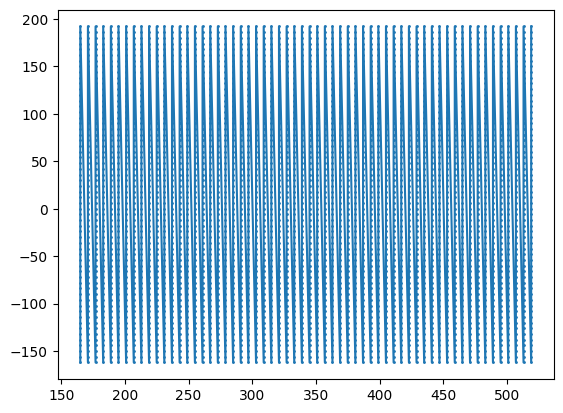

In [28]:
plt.scatter(*phi_psi_array.T, s=1)
plt.plot(*phi_psi_array.T)

In [93]:
with open(
    f"/cluster/home/schmidtn/master/wahlprak/xtb-confs/confs/ALA_neutral_singlet.xyz/test_xyz_output.xyz",
    "a",
) as t:
    for i in range(3600):
        with open(
            f"/cluster/home/schmidtn/master/wahlprak/xtb-confs/confs/ALA_neutral_singlet.xyz/dih2dscan-{i}.inp.xyz",
            "r",
        ) as f:
            t.write(f.read())

In [127]:
import ase
from ase import io
from ase.visualize import view

atoms = io.read(
    f"/cluster/home/schmidtn/master/wahlprak/xtb-confs/confs/ALA_neutral_singlet.xyz/dih2dscan-{1}.inp.xyz"
)

view(atoms, viewer="x3d")

In [157]:
all_atoms = []
phis, psis = [], []

for i in range(3600):
    atoms = io.read(
        f"/cluster/home/schmidtn/master/wahlprak/xtb-confs/confs/ALA_neutral_singlet.xyz/dih2dscan-{i}.inp.xyz"
    )
    phi, psi = (
        atoms.get_dihedral(31, 17, 14, 12, mic=False),
        atoms.get_dihedral(17, 14, 12, 7, mic=False) % 180 - 180,
    )
    all_atoms.append(atoms)
    phis.append(phi)
    psis.append(psi)

In [110]:
numbered_ordered_order_dih = ordered_order_dih.tolist()

for i in range(len(ordered_order_dih)):
    numbered_ordered_order_dih[i].append(i)

ordered_numbered_ordered_order_dih = sorted(
    numbered_ordered_order_dih, key=lambda x: (x[0], x[1])
)

# print(f"num: {numbered_ordered_order_dih}")
# print(f"ordnum: {ordered_numbered_ordered_order_dih}")

# x = ordered_order_dih.tolist()
# print(type(x[1]))

ordnum: [[165.0, -162.0, 0], [165.0, -156.0, 2], [165.0, -150.0, 8], [165.0, -144.0, 10], [165.0, -138.0, 32], [165.0, -132.0, 34], [165.0, -126.0, 40], [165.0, -120.0, 42], [165.0, -114.0, 128], [165.0, -108.0, 130], [165.0, -102.0, 136], [165.0, -96.0, 138], [165.0, -90.0, 160], [165.0, -84.0, 162], [165.0, -78.0, 168], [165.0, -72.0, 170], [165.0, -66.0, 512], [165.0, -60.0, 514], [165.0, -54.0, 520], [165.0, -48.0, 522], [165.0, -42.0, 544], [165.0, -36.0, 546], [165.0, -30.0, 552], [165.0, -24.0, 554], [165.0, -18.0, 640], [165.0, -12.0, 642], [165.0, -6.0, 648], [165.0, 0.0, 650], [165.0, 6.0, 672], [165.0, 12.0, 674], [165.0, 18.0, 680], [165.0, 24.0, 682], [165.0, 30.0, 1920], [165.0, 36.0, 1922], [165.0, 42.0, 1928], [165.0, 48.0, 1930], [165.0, 54.0, 1952], [165.0, 60.0, 1954], [165.0, 66.0, 1960], [165.0, 72.0, 1962], [165.0, 78.0, 2048], [165.0, 84.0, 2050], [165.0, 90.0, 2056], [165.0, 96.0, 2058], [165.0, 102.0, 2080], [165.0, 108.0, 2082], [165.0, 114.0, 2088], [165.0, 1

In [111]:
order_of_ordered_numbered_ordered_order_dih = []
for i in range(len(ordered_numbered_ordered_order_dih)):
    order_of_ordered_numbered_ordered_order_dih.append(
        ordered_numbered_ordered_order_dih[i][2]
    )

# print(order_of_ordered_numbered_ordered_order_dih)

[0, 2, 8, 10, 32, 34, 40, 42, 128, 130, 136, 138, 160, 162, 168, 170, 512, 514, 520, 522, 544, 546, 552, 554, 640, 642, 648, 650, 672, 674, 680, 682, 1920, 1922, 1928, 1930, 1952, 1954, 1960, 1962, 2048, 2050, 2056, 2058, 2080, 2082, 2088, 2090, 2432, 2434, 2440, 2442, 2464, 2466, 2472, 2474, 2560, 2562, 2568, 2570, 1, 3, 9, 11, 33, 35, 41, 43, 129, 131, 137, 139, 161, 163, 169, 171, 513, 515, 521, 523, 545, 547, 553, 555, 641, 643, 649, 651, 673, 675, 681, 683, 1921, 1923, 1929, 1931, 1953, 1955, 1961, 1963, 2049, 2051, 2057, 2059, 2081, 2083, 2089, 2091, 2433, 2435, 2441, 2443, 2465, 2467, 2473, 2475, 2561, 2563, 2569, 2571, 4, 6, 12, 14, 36, 38, 44, 46, 132, 134, 140, 142, 164, 166, 172, 174, 516, 518, 524, 526, 548, 550, 556, 558, 644, 646, 652, 654, 676, 678, 684, 686, 1924, 1926, 1932, 1934, 1956, 1958, 1964, 1966, 2052, 2054, 2060, 2062, 2084, 2086, 2092, 2094, 2436, 2438, 2444, 2446, 2468, 2470, 2476, 2478, 2564, 2566, 2572, 2574, 5, 7, 13, 15, 37, 39, 45, 47, 133, 135, 141, 14

In [112]:
with open(
    f"/cluster/home/schmidtn/master/wahlprak/xtb-confs/confs/ALA_neutral_singlet.xyz/test_xyz_output_ordered.xyz",
    "a",
) as t:
    for i in order_of_ordered_numbered_ordered_order_dih:
        with open(
            f"/cluster/home/schmidtn/master/wahlprak/xtb-confs/confs/ALA_neutral_singlet.xyz/dih2dscan-{i}.inp.xyz",
            "r",
        ) as f:
            t.write(f.read())

In [167]:
gnorms, energies = [], []

for i in range(3600):
    with open(
        f"/cluster/home/schmidtn/master/wahlprak/xtb-confs/confs/ALA_neutral_singlet.xyz/dih2dscan-{i}.inp.xyz",
        "r",
    ) as f:
        _, energy, _, gnorm, _, _, _ = f.read().split("\n")[1].split()
        energies.append(float(energy))
        gnorms.append(float(gnorm))

In [168]:
gnorms = np.array(gnorms)

In [169]:
energies = np.array(energies)

energies_min_shift = energies - min(energies)

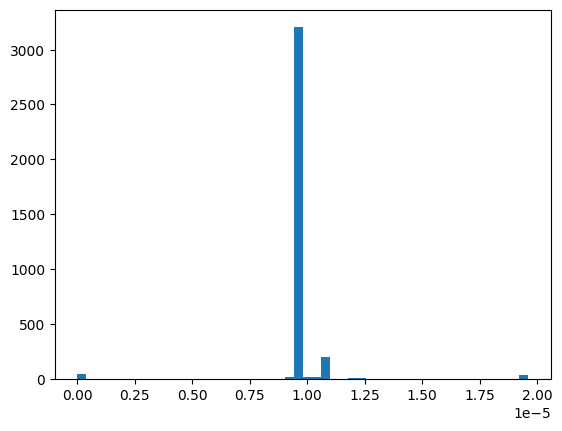

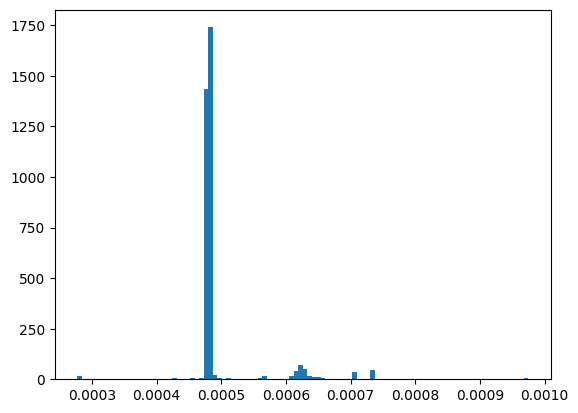

In [180]:
_ = plt.hist(energies_min_shift, bins=50)
plt.show()
_ = plt.hist(gnorms, bins=100)

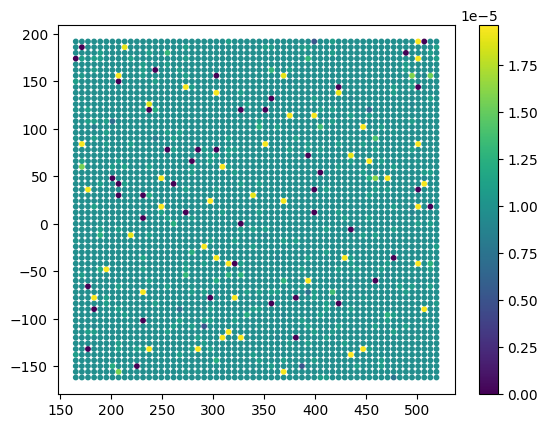

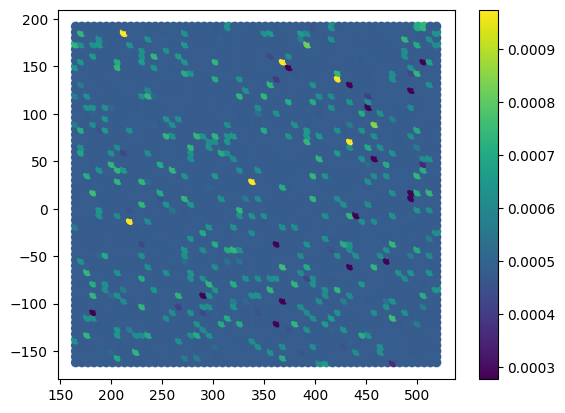

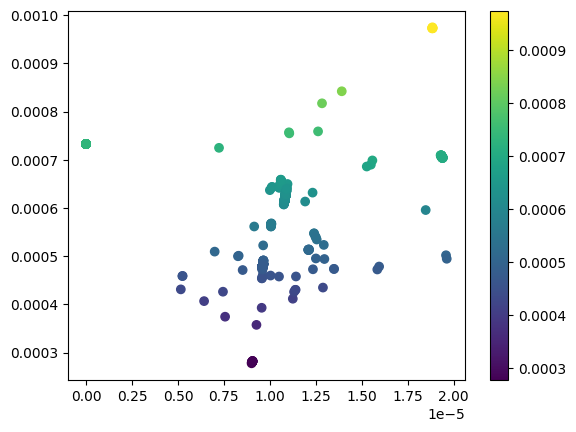

In [178]:
s = plt.scatter(*ordered_order_dih.T, c=energies_min_shift, s=10)
plt.colorbar(s)
plt.show()
s = plt.scatter(*ordered_order_dih.T, c=gnorms)
plt.colorbar(s)
plt.show()
s = plt.scatter(energies_min_shift, gnorms, c=gnorms)
plt.colorbar(s)
plt.show()

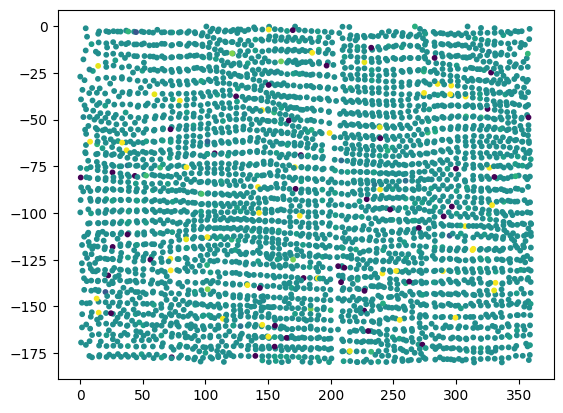

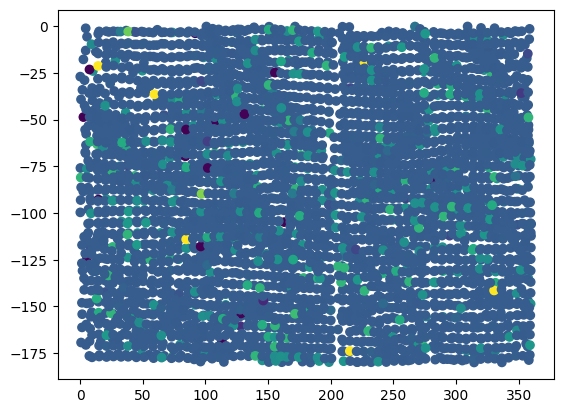

In [179]:
plt.scatter(phis, psis, c=energies_min_shift, s=10)
plt.show()
plt.scatter(phis, psis, c=gnorms)
plt.show()

In [184]:
import polars as pl

phi_psi_df = pl.DataFrame(
    {"phi": phis, "psi": psis, "energy": energies, "gnorm": gnorms}
)

In [192]:
phi_psi_df.sort(by="energy")[1:100, 2]

energy
f64
-62.486143
-62.486143
-62.486143
-62.486143
-62.486143
…
-62.486134
-62.486134
-62.486134


In [187]:
energies

array([-62.48613351, -62.48613352, -62.48613349, ..., -62.48613223,
       -62.48613351, -62.48613352], shape=(3600,))

In [193]:
phi_psi_df.describe()

statistic,phi,psi,energy,gnorm
str,f64,f64,f64,f64
"""count""",3600.0,3600.0,3600.0,3600.0
"""null_count""",0.0,0.0,0.0,0.0
"""mean""",183.557618,-91.516394,-62.486133,0.000496
"""std""",102.637678,51.34912,0.000002,0.000057
"""min""",0.07648,-179.970902,-62.486143,0.000278
"""25%""",97.529795,-135.873867,-62.486134,0.000479
"""50%""",180.379773,-92.501058,-62.486134,0.00048
"""75%""",271.657078,-48.546417,-62.486134,0.000481
"""max""",359.957999,-0.115728,-62.486124,0.000975


In [195]:
(-62.486143 - -62.486124) * 23

-0.00043700000004065487